## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## About the dataset:
This [data article](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0005) describes a datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). the dataset contains 32 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. the dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, this dataset can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields. 
You can download the Hotel Booking Demand dataset from the Kaggle [click here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

## Attribute Information:
- **hotel**: Hotel (Resort Hotel, City Hotel)
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 32)

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Does the type of payment affect the cancellation of the reservation or not?

In [9]:
Data = df['deposit_type'].value_counts()
Data

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

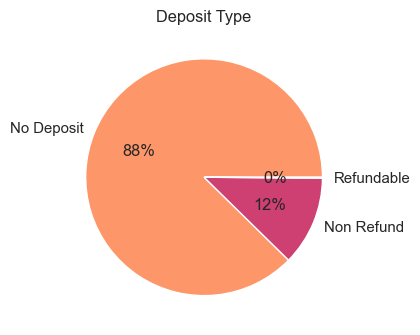

In [250]:
plt.figure(dpi=98)
plt.pie(Data, labels=Data.index, autopct='%1.0f%%', colors=sns.color_palette("magma", 8)[-2::-2])
plt.title('Deposit Type')
plt.show()

### Insights:
- With (No Deposit) visitors are more likely to cancel.
- With (Non Refund) visitor stil canceles but with low chances.

## Does length of time between the entering date of the booking and the arrival date affect the cancellation?

In [11]:
CountDF = df.groupby(['lead_time']).count()
SumDF = df.groupby(['lead_time']).sum()

In [12]:
ResultDF = pd.DataFrame(CountDF.index, columns=['lead_time'])

ResultDF['percent'] = (SumDF['is_canceled'] / CountDF['is_canceled']) *100
ResultDF

,lead_time,percent
0,0,6.776990
1,1,9.277457
2,2,10.294828
3,3,10.022026
4,4,10.262391
...,...,...
474,622,NaN
475,626,100.000000
476,629,42.307692
477,709,NaN


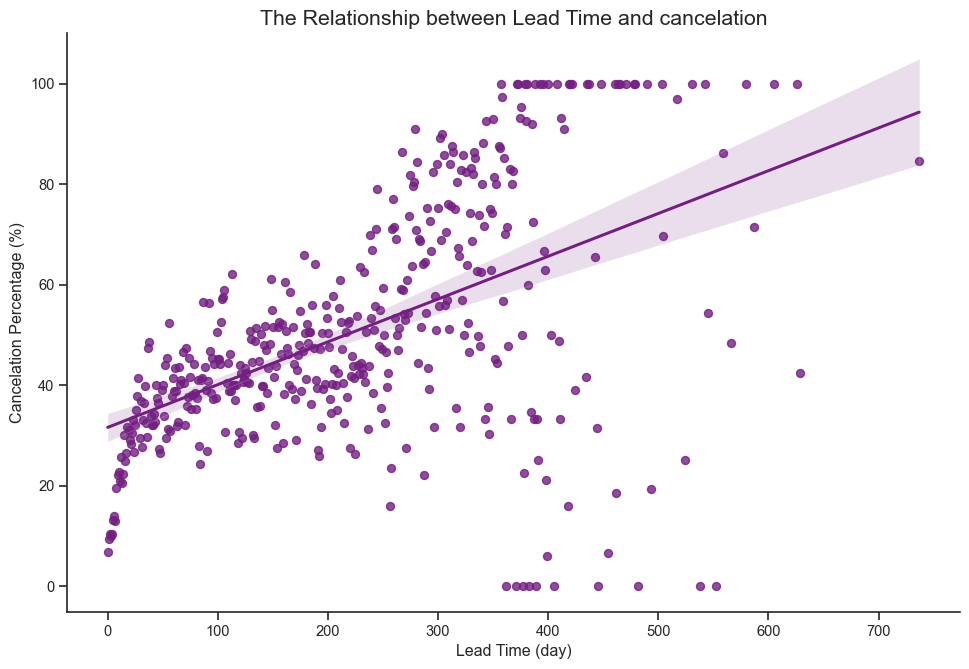

In [121]:
plt.figure(figsize=(12,8), dpi=96)
sns.regplot(data=ResultDF, x='lead_time', y='percent', color=sns.color_palette("magma", 2)[0])
plt.title('The Relationship between Lead Time and cancelation', fontdict={'fontsize': 16})
plt.xlabel('Lead Time (day)')
plt.ylabel('Cancelation Percentage (%)')
plt.show()

### Insights:
- There is a high correlation between lead time and cancelation in range 0 to 100 days.
- form approx. 300 days (a year) the odds differ, to makes uncertinty.

In [19]:
TempDF = df.groupby(['arrival_date_month', 'hotel', 'is_canceled']).count()
TempList = TempDF.index
TempCount = TempDF['is_canceled'].values
#MonthDF['arrival_date_month'] = TempDF['arrival_date_month']
Months1 = []
Hotels1 = []
Count1 = []
Months2 = []
Hotels2 = []
Count2 = []
for i, _ in enumerate(TempList):
    if i == 0 or i%2 == 0:
        Months2.append(TempList[i][0])
        Hotels2.append(TempList[i][1])
        Count2.append(TempCount[i])
    else:
        Months1.append(TempList[i][0])
        Hotels1.append(TempList[i][1])
        Count1.append(TempCount[i])

MonthDF = pd.DataFrame(Months2, columns=['Months'])
MonthDF['Hotel1'] = Hotels1
MonthDF['Count1'] = Count1
MonthDF['Hotel2'] = Hotels2
MonthDF['Count2'] = Count2
MonthDF

,Months,Hotel1,Count1,Hotel2,Count2
0,April,Resort Hotel,3609,City Hotel,7480
1,August,Resort Hotel,4894,City Hotel,8983
2,December,Resort Hotel,2648,City Hotel,4132
3,February,Resort Hotel,3103,City Hotel,4965
4,January,Resort Hotel,2193,City Hotel,3736
5,July,Resort Hotel,4573,City Hotel,8088
6,June,Resort Hotel,3045,City Hotel,7894
7,March,Resort Hotel,3336,City Hotel,6458
8,May,Resort Hotel,3559,City Hotel,8232
9,November,Resort Hotel,2437,City Hotel,4357


## Which months that have lowest number of visitors?

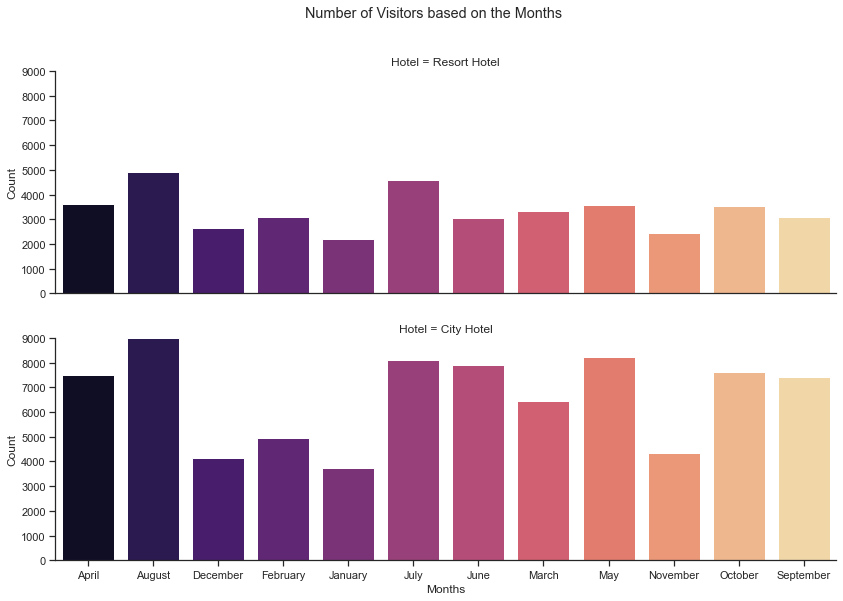

In [111]:
plt.figure(figsize=(14,9),dpi=72)
plt.subplot(2,1,1)
plt.title('Hotel = Resort Hotel')
sns.barplot(x=MonthDF['Months'], y=MonthDF['Count1'], palette='magma')
plt.ylabel('Count')
plt.ylim(0,9000)
plot1 = plt.gca()
plot1.axes.get_xaxis().set_visible(False)
plt.subplot(2,1,2)
plt.title('Hotel = City Hotel')
sns.barplot(x=MonthDF['Months'], y=MonthDF['Count2'], palette='magma')
plt.ylabel('Count')
plt.ylim(0,9000)

plt.suptitle('Number of Visitors based on the Months')
plt.show()

### insight:
- January is the Least month in count of visitors.

## Check if the lowest number of visitors due to the increase in the number of the canceled reservations?

In [143]:
TempDF = df.groupby(['arrival_date_month', 'hotel', 'is_canceled']).count()
TempList = TempDF.index
TempCount = TempDF['lead_time'].values
Months1 = []
Hotels1 = []
is_canceled1 = []
Count1 = []
Months2 = []
Hotels2 = []
is_canceled2 = []
Count2 = []
ctr = 0
for i in range(len(TempList)):
    if i == 0 or i%2 == 0:
        Months2.append(TempList[i][0])
        Hotels2.append(TempList[i][1])
        is_canceled2.append(TempList[i][2])
        Count2.append(TempCount[i])     
    else:
        Months1.append(TempList[i][0])
        Hotels1.append(TempList[i][1])
        is_canceled1.append(TempList[i][2])
        Count1.append(TempCount[i])
            

Month2DF = pd.DataFrame(Months2, columns=['Months'])
Month2DF['Hotel1'] = Hotels1
Month2DF['Count1'] = Count1
Month2DF['is_canceled1'] = is_canceled1

Month2DF['Hotel2'] = Hotels2
Month2DF['Count2'] = Count2
Month2DF['is_canceled2'] = is_canceled2
Month2DF
Month2DF1 = Month2DF[Month2DF['Hotel1'] == 'City Hotel'].reset_index()
Month2DF1.drop(columns=['index'])
Month2DF2 = Month2DF[Month2DF['Hotel2'] == 'Resort Hotel'].reset_index()
Month2DF2.drop(columns=['index'])

,Months,Hotel1,Count1,is_canceled1,Hotel2,Count2,is_canceled2
0,April,Resort Hotel,1059,1,Resort Hotel,2550,0
1,August,Resort Hotel,1637,1,Resort Hotel,3257,0
2,December,Resort Hotel,631,1,Resort Hotel,2017,0
3,February,Resort Hotel,795,1,Resort Hotel,2308,0
4,January,Resort Hotel,325,1,Resort Hotel,1868,0
5,July,Resort Hotel,1436,1,Resort Hotel,3137,0
6,June,Resort Hotel,1007,1,Resort Hotel,2038,0
7,March,Resort Hotel,763,1,Resort Hotel,2573,0
8,May,Resort Hotel,1024,1,Resort Hotel,2535,0
9,November,Resort Hotel,461,1,Resort Hotel,1976,0


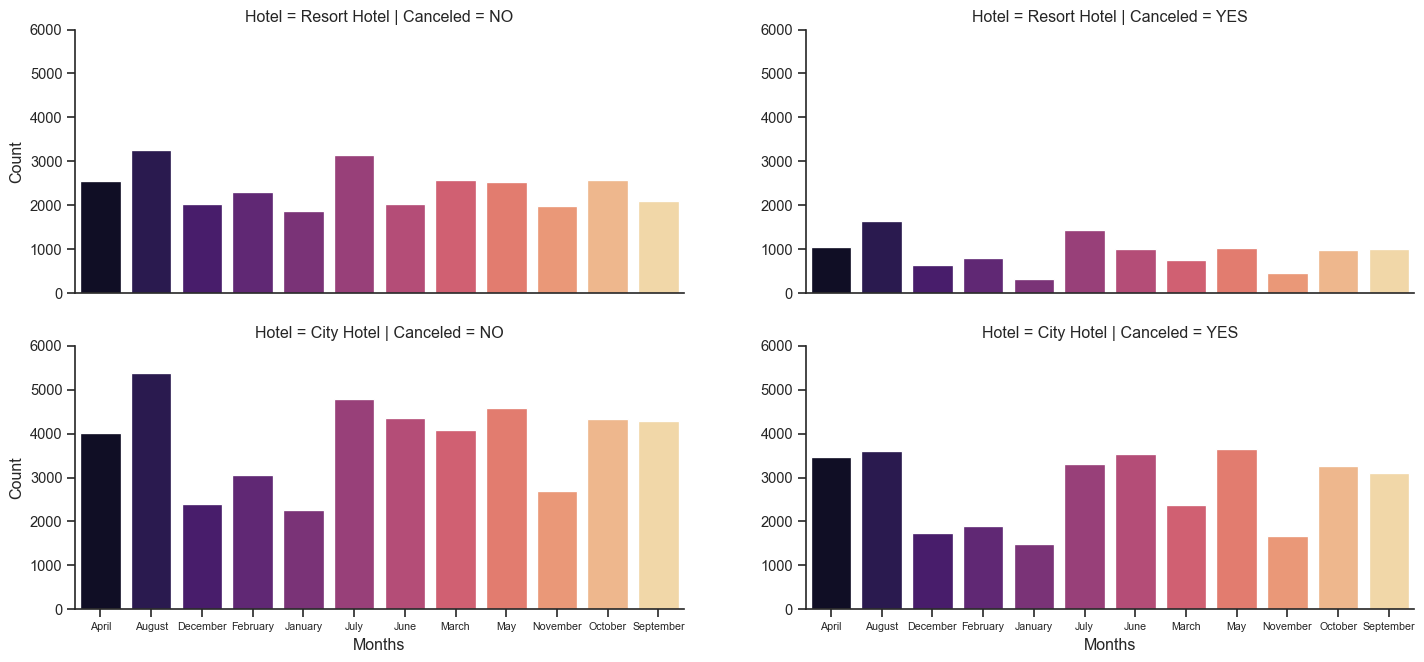

In [245]:
plt.figure(figsize=(18,8), dpi=96)
plt.subplot(2,2,1)
plt.title('Hotel = Resort Hotel | Canceled = NO')
sns.barplot(x=Month2DF2['Months'], y=Month2DF2['Count2'], palette='magma')
plt.ylabel('Count')
plt.ylim(0,6000)
plot = plt.gca()
plot.axes.get_xaxis().set_visible(False)
plt.subplot(2,2,2)
plt.title('Hotel = Resort Hotel | Canceled = YES')
sns.barplot(x=Month2DF2['Months'], y=Month2DF2['Count1'], palette='magma')
plt.ylabel('')
plt.ylim(0,6000)
plot = plt.gca()
plot.axes.get_xaxis().set_visible(False)
plt.subplot(2,2,3)
plt.title('Hotel = City Hotel | Canceled = NO')
sns.barplot(x=Month2DF1['Months'], y=Month2DF1['Count2'], palette='magma')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.ylim(0,6000)
plt.subplot(2,2,4)
plt.title('Hotel = City Hotel | Canceled = YES')
sns.barplot(x=Month2DF1['Months'], y=Month2DF1['Count1'], palette='magma')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.ylim(0,6000)
plt.show()

### Insights:
- Resort Hotels are highly affected in term of number of visitors due to cancelations (lower visitors).
- City Hotels are affeced by the cancelations but in minor matter.

## Which top 10 countries that visitors come from?      

In [192]:
TempDF = df.groupby(df.country).count()
TempDF = TempDF.sort_values(by=['is_canceled'])[-1:-11:-1]
TempList = [x for x in TempDF.index]
VistorDF = pd.DataFrame(TempList, columns=['Country'])
VistorDF['Count'] = TempDF['hotel'].values
VistorDF

,Country,Count
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


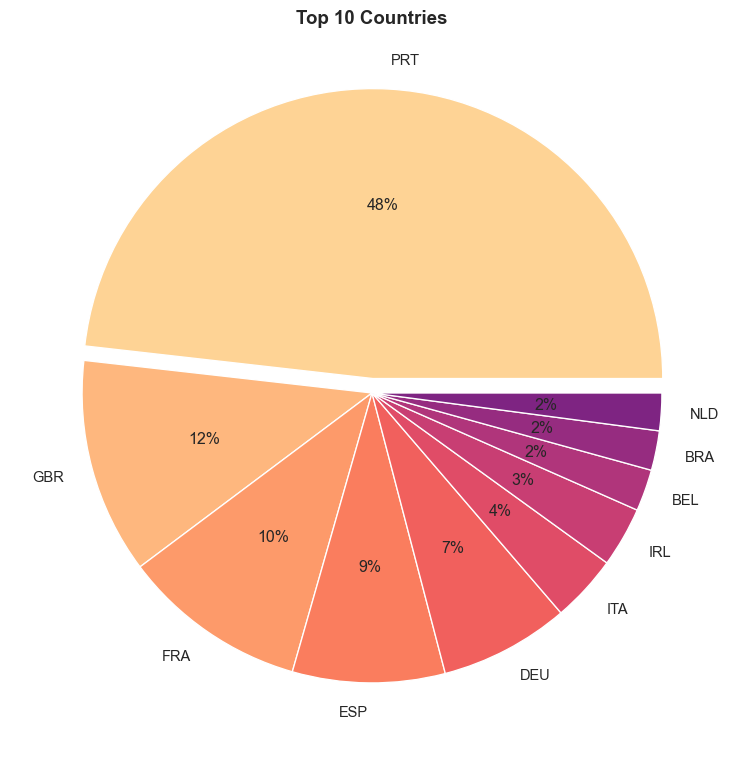

In [224]:
plt.figure(figsize=(10,10), dpi=96)
explode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(VistorDF['Count'], labels=VistorDF['Country'], colors=sns.color_palette("magma", 32)[-3::-2], autopct='%.0f%%', explode=explode )
plt.title('Top 10 Countries', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

### Insights:
- 48% Percent of the to 10 are form Portgual so, MOST of Visitors are the citiziens (locals to the country). 
- MOST foreigners are from Great Britain and France

## Relation between booking changes and cancelling the reservation

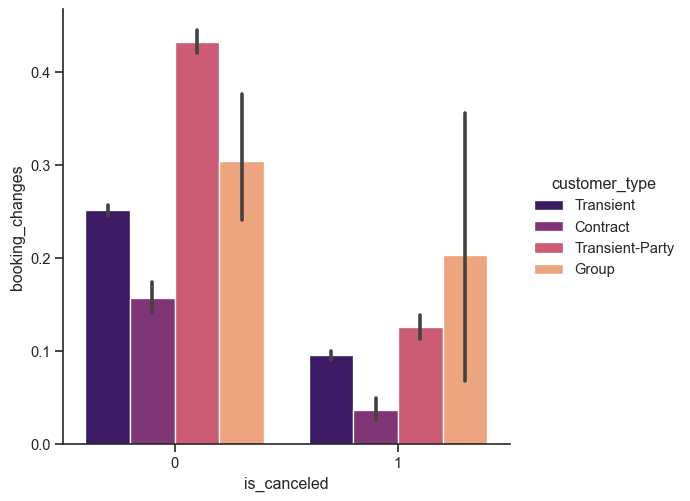

In [244]:
plt.figure(figsize=(6,6),dpi=96)
sns.barplot(data=df, x='is_canceled', y='booking_changes', hue='customer_type', palette='magma')
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5), title='customer_type', frameon= False)

### Insights:
- Group (customer_type) are the MOST whom made changes either canceled at the end or checked-in.
- Contarct (customer_type) are the LESS whom made changes either canceled at the end or checked-in.

# Data Preprocessing

In [16]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# Drop the columns with null values
df = df.drop(['agent' ,'company', 'country'], axis=1, errors="ignore")

In [18]:
df.dropna(subset = ["children"], inplace=True)

In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [20]:
df = df.drop(['hotel','arrival_date_month','meal','customer_type',
              'market_segment', 'distribution_channel','assigned_room_type',
              'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status', 
              'reservation_status_date'], axis=1, errors="ignore")

In [21]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [22]:
X, y = df.drop(['is_canceled'],axis=1), df['is_canceled']

### Choose any machine learning algorithm to predict cancellation 
- use train-test split
- use cross-validation split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape

<IPython.core.display.Javascript object>

((71631, 17), (71631,))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LogisticRegr = LogisticRegression()

In [34]:
LogisticRegr.fit(X_train, y_train)

LogisticRegression()

In [35]:
LogisticRegrResult = LogisticRegr.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, LogisticRegrResult))

Accuracy: 0.7206575227724845


In [39]:
print(metrics.confusion_matrix(y_test, LogisticRegrResult))

[[25777  4214]
 [ 9126  8638]]


In [133]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

<IPython.core.display.Javascript object>

0.7286566851638572

In [37]:
scores = cross_val_score(LogisticRegr, X, y, cv=10)
scores

<IPython.core.display.Javascript object>

array([0.61412179, 0.68422816, 0.69871849, 0.6243404 , 0.68121283,
       0.75391574, 0.59901156, 0.75548668, 0.75490032, 0.63754398])

In [38]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Accuracy: {:.1f} %".format(scores.mean()*100))

0.68 accuracy with a standard deviation of 0.06
Accuracy: 68.0 %


In [42]:
from sklearn.model_selection import cross_val_predict
predicted_values = cross_val_predict(LogisticRegr,X,y,cv=10)
predicted_values.shape

(119386,)

In [43]:
metrics.accuracy_score(y, predicted_values)

0.6803477794716298

In [40]:
from sklearn.model_selection import cross_validate #for evaluating the model by cross-validation.
results = cross_validate(LogisticRegr,X,y,cv=10)
results

{'fit_time': array([0.76955676, 0.76506662, 0.82853532, 0.75150347, 0.80599475,
        0.81595635, 0.6601758 , 0.65970945, 0.7230587 , 0.74326634]),
 'score_time': array([0.00298953, 0.00199342, 0.00336361, 0.00299215, 0.00402212,
        0.00216079, 0.00300026, 0.00398803, 0.00267529, 0.00199294]),
 'test_score': array([0.61412179, 0.68422816, 0.69871849, 0.6243404 , 0.68121283,
        0.75391574, 0.59901156, 0.75548668, 0.75490032, 0.63754398])}